In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/MLDataset/train-ml.csv");
test = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/MLDataset/test-ml.csv");

X_train = train.drop(labels=['label'], axis = 1);
Y_train = train['label']
X_test = test.drop(labels=['label'], axis = 1);
Y_test = test['label']

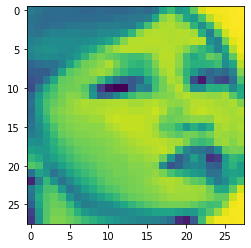

In [ ]:
def gen_image(image):
  pixels = image.reshape(28, 28)
  plt.imshow(pixels)
  plt.show()

gen_image(np.array(X_train.iloc[0]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 550)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=550,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [20, 30],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [4, 8, 10, 12],
    'n_estimators': [200, 550, 1000]
}

grid_search_rf = RandomizedSearchCV(rf, param_grid, cv = 5, verbose = 2)
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90, total=   2.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90, total=   2.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90, total=   2.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90, total=   2.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=20, max_depth=90, total=   2.8s
[CV] n_estimators=1000, min_samples_split=8, min_samples_leaf=2, max_features=20, max_depth=100 
[CV]  n_estimators=1000, min_samples_split=8, min_samples_leaf=2, max_features=20, max_depth=100, total=  13.7s
[CV] n_estimators=1000, min_samples_split=8, min_samples_le

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
grid_search_rf.best_params_

{'max_depth': 80,
 'max_features': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [ ]:
grid_search_rf.best_score_

0.8937032533191184

In [ ]:
rf = RandomForestClassifier(max_depth= 80,max_features= 30,min_samples_leaf=2,min_samples_split= 10,n_estimators= 200)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)
y_test = Y_test.values

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[288  11]
 [ 38 243]]
              precision    recall  f1-score   support

        face       0.88      0.96      0.92       299
      masked       0.96      0.86      0.91       281

    accuracy                           0.92       580
   macro avg       0.92      0.91      0.92       580
weighted avg       0.92      0.92      0.92       580

0.9155172413793103


0.9172413793103448


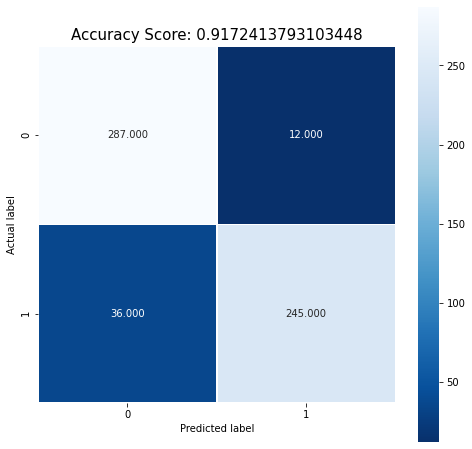

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

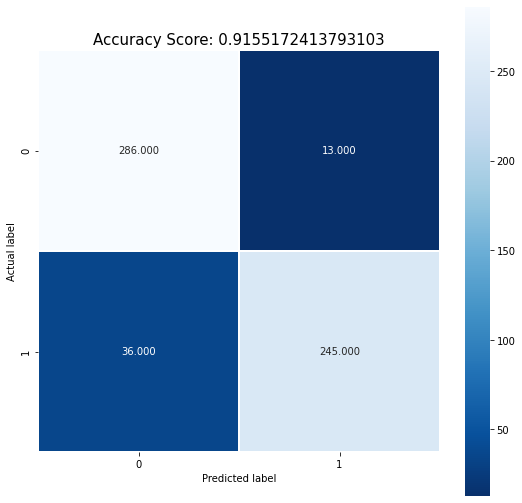

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);


Text(0.5, 1.0, 'Performance of Randon Forest Tree Model')

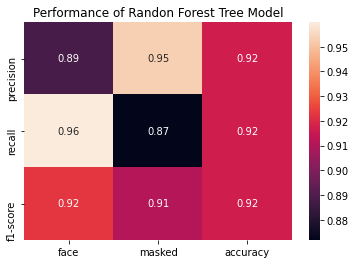

In [ ]:
clf_report = classification_report(y_test,y_pred , output_dict=True)
plotmap = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :3], annot=True, linecolor='black')
plt.title("Performance of Randon Forest Tree Model")

# Predicting image

In [ ]:
from PIL import Image
import cv2

In [ ]:
img = np.array(Image.open("/content/drive/MyDrive/unproper.JPG").resize((28, 28)))
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
final = imgGray.flatten()
image2 = pd.DataFrame(final.reshape(-1, len(final)))
print(rf.predict(image2));

['masked']


In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/model_rf', 'wb') as f:
  pickle.dump(rf, f)

In [ ]:
with open('/content/drive/MyDrive/model_rf', 'rb') as f:
  mrf = pickle.load(f)

In [ ]:
mrf.predict(image2)

array(['masked'], dtype=object)

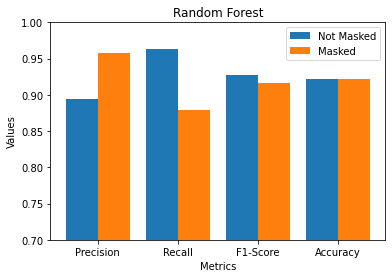

In [ ]:
report_data = classification_report(y_test,y_pred, output_dict=True)
x = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
acc=0
accuracy = 0
y = []
z = []
for key , value in report_data.items():
  acc+=1
  if(acc == 3):
    accuracy = value
    break

  for k , v in value.items():
    if(acc == 1): 
      y.append(v)
    if(acc == 2): 
      z.append(v)
y.pop()
y.append(accuracy)
z.pop()
z.append(accuracy)

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y, 0.4, label = 'Not Masked')
plt.bar(x_axis + 0.2, z, 0.4, label = 'Masked')

plt.xticks(x_axis, x)
plt.ylim([0.70,1.0])
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Random Forest")
plt.legend()
plt.show()